In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('coviddata.csv',skiprows=3, sep="\t")

In [3]:
df.head(3)

,Gene ID,Gene Name,'COVID-19' vs 'normal' in 'colon' .foldChange,'COVID-19' vs 'normal' in 'colon'.pValue,'COVID-19' vs 'normal' in 'lung' .foldChange,'COVID-19' vs 'normal' in 'lung'.pValue
0,ENSG00000000003,TSPAN6,0.2,0.813312,-0.4,0.670524
1,ENSG00000000005,TNMD,-1.9,0.014671,-0.2,0.883507
2,ENSG00000000419,DPM1,0.6,0.208810,0.7,0.139756


In [4]:
#sklearn perform 1,linear 2, classification, 3, random trees, 4, clustering 5, k prediction using elbow plots 

df.rename(columns={
    "'COVID-19' vs 'normal' in 'colon' .foldChange": "Colon_FoldChange",
    "'COVID-19' vs 'normal' in 'colon'.pValue": "Colon_pValue",
    "'COVID-19' vs 'normal' in 'lung' .foldChange": "Lung_FoldChange",
    "'COVID-19' vs 'normal' in 'lung'.pValue": "Lung_pValue"
}, inplace=True)

In [5]:
df.head(3)

,Gene ID,Gene Name,Colon_FoldChange,Colon_pValue,Lung_FoldChange,Lung_pValue
0,ENSG00000000003,TSPAN6,0.2,0.813312,-0.4,0.670524
1,ENSG00000000005,TNMD,-1.9,0.014671,-0.2,0.883507
2,ENSG00000000419,DPM1,0.6,0.208810,0.7,0.139756


In [6]:
def rename_valid(df):
    expected_columns = ['Colon_FoldChange', 'Colon_pValue', 'Lung_FoldChange', 'Lung_pValue']
    if all(col in df.columns for col in expected_columns):
        print("Columns renamed successfully.")
    else:
        print("Renaming failed. Check column names.")
print(rename_valid)

<function rename_valid at 0x000001F413A95F80>


In [7]:
df.head(3)

,Gene ID,Gene Name,Colon_FoldChange,Colon_pValue,Lung_FoldChange,Lung_pValue
0,ENSG00000000003,TSPAN6,0.2,0.813312,-0.4,0.670524
1,ENSG00000000005,TNMD,-1.9,0.014671,-0.2,0.883507
2,ENSG00000000419,DPM1,0.6,0.208810,0.7,0.139756


In [12]:
# Remove spaces from column names
df.rename(columns=lambda x: x.strip().replace(" ", "_"), inplace=True)

# Display the modified column names
print(df.columns)

Index(['Gene_ID', 'Gene_Name', 'Colon_FoldChange', 'Colon_pValue',
       'Lung_FoldChange', 'Lung_pValue'],
      dtype='object')


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


# Drop rows with missing values
df.dropna(inplace=True)

# Check column names
print(df.columns)

# Separate features and target
X = df.drop(columns=['Gene_ID', 'Gene_Name', 'Colon_pValue', 'Lung_pValue'])
y = np.where(df['Colon_FoldChange'] > df['Lung_FoldChange'], 'Colon', 'Lung')

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Build pipeline
pipeline = Pipeline([
    ('selector', SelectKBest(score_func=f_classif, k='all')),  # Adjusted k value
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Cross-validation
cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5)
print("Cross-validation scores:", cv_scores)

# Fit pipeline on training data
pipeline.fit(X_train, y_train)

# Predict on test data
y_pred = pipeline.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Index(['Gene_ID', 'Gene_Name', 'Colon_FoldChange', 'Colon_pValue',
       'Lung_FoldChange', 'Lung_pValue'],
      dtype='object')
Cross-validation scores: [0.99904875 0.99881094 0.99881094 0.99952438 0.99952426]
Accuracy: 0.9992391097584173


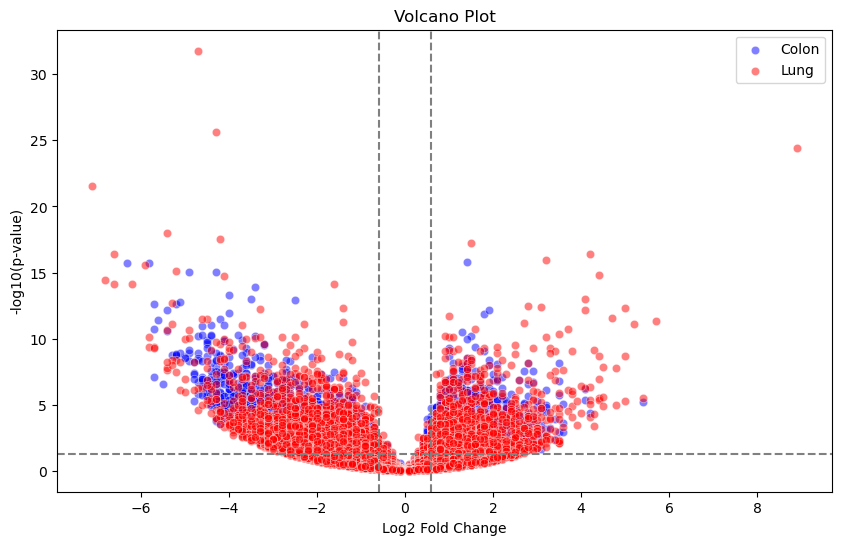

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.multitest import multipletests

# Step 1: Load single-cell expression data

# Step 2: Perform preprocessing (not required for this example)

# Step 3: Perform differential expression analysis using DESeq2 (assuming data is already normalized)
# For simplicity, we'll use fold change and p-value filtering directly

# Set fold change and p-value thresholds
fold_change_threshold = 1.5
p_value_threshold = 0.05

# Calculate absolute fold change
df['Abs_Colon_FoldChange'] = np.abs(df['Colon_FoldChange'])
df['Abs_Lung_FoldChange'] = np.abs(df['Lung_FoldChange'])

# Filter genes based on fold change and p-value
sig_diff_genes_colon = df[(df['Abs_Colon_FoldChange'] >= fold_change_threshold) & (df['Colon_pValue'] < p_value_threshold)]
sig_diff_genes_lung = df[(df['Abs_Lung_FoldChange'] >= fold_change_threshold) & (df['Lung_pValue'] < p_value_threshold)]

# Step 4: Identify significantly differentially expressed genes
# Combine significant genes from both tissues
sig_diff_genes = pd.concat([sig_diff_genes_colon, sig_diff_genes_lung])

# Concatenate gene lists for colon and lung tissues
all_sig_diff_genes = pd.concat([sig_diff_genes_colon, sig_diff_genes_lung])

# Save the list of differentially expressed genes to a new CSV file
all_sig_diff_genes.to_csv('differentiallyexpressedgenes.csv', index=False)


# Step 5: Evaluate accuracy (not applicable in this code snippet)

# Step 6: Visualize results
# Volcano plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Colon_FoldChange', y=-np.log10(df['Colon_pValue']), data=df, label='Colon', color='blue', alpha=0.5)
sns.scatterplot(x='Lung_FoldChange', y=-np.log10(df['Lung_pValue']), data=df, label='Lung', color='red', alpha=0.5)
plt.axhline(-np.log10(p_value_threshold), color='gray', linestyle='--')
plt.axvline(np.log2(fold_change_threshold), color='gray', linestyle='--')
plt.axvline(-np.log2(fold_change_threshold), color='gray', linestyle='--')
plt.xlabel('Log2 Fold Change')
plt.ylabel('-log10(p-value)')
plt.title('Volcano Plot')
plt.legend()
plt.show()